In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#shape shows the number of rows and columns in the dataset
dataset = pd.read_csv('red-wine.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
feature_list = dataset.columns[:-1].values
label = [dataset.columns[-1]]

print("Features: ", feature_list)
print("Labels: ", label)

Features:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Labels:  ['quality']


In [5]:
#Info is used to obtain a concise summary of dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#.describe() function gives a statistical summary of the dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#value_counts() is used to find the occurance of unique values with the number of occurance
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
#For checking any null values in dataset

dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
dataset.dropna(inplace=True) #in total_bedrooms

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
from sklearn.model_selection import train_test_split
x = dataset.drop(['quality'], axis = 1)
y = dataset['quality']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [13]:
train_data = x_train.join(y_train)

In [14]:
train_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
376,11.5,0.450,0.50,3.0,0.078,19.0,47.0,1.00030,3.26,1.11,11.0,6
282,7.6,0.520,0.12,3.0,0.067,12.0,53.0,0.99710,3.36,0.57,9.1,5
1067,11.1,0.310,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,7
536,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
698,9.4,0.615,0.28,3.2,0.087,18.0,72.0,1.00010,3.31,0.53,9.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
304,8.4,0.650,0.60,2.1,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,5
178,7.0,0.805,0.00,2.5,0.068,7.0,20.0,0.99690,3.48,0.56,9.6,5
1472,7.6,0.350,0.60,2.6,0.073,23.0,44.0,0.99656,3.38,0.79,11.1,6


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

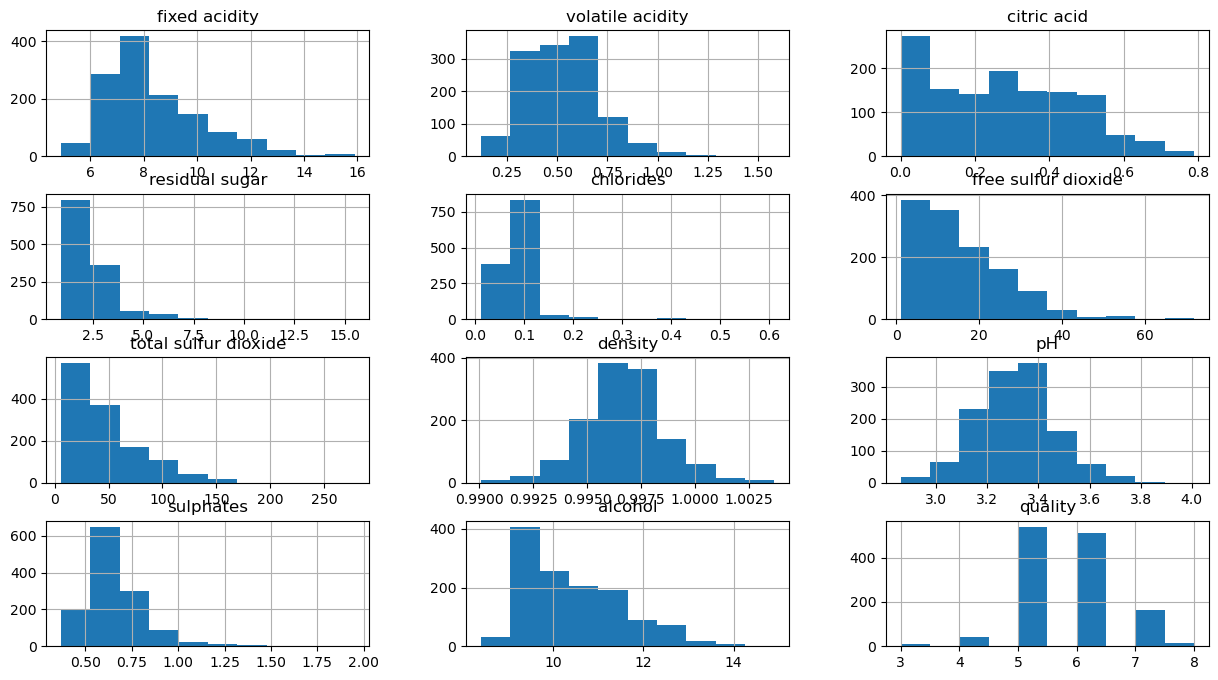

In [15]:
train_data.hist(figsize = (15,8))

In [16]:
train_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.249910,0.675341,0.093872,0.090112,-0.155973,-0.119181,0.669119,-0.687738,0.195139,-0.077578,0.124604
volatile acidity,-0.249910,1.000000,-0.546237,-0.002861,0.067157,-0.009807,0.095983,0.018997,0.227549,-0.265398,-0.192620,-0.396760
citric acid,0.675341,-0.546237,1.000000,0.134064,0.180300,-0.062778,0.025381,0.376585,-0.533868,0.303362,0.090664,0.232448
residual sugar,0.093872,-0.002861,0.134064,1.000000,0.066470,0.211074,0.206306,0.351917,-0.076365,-0.016817,0.024323,-0.014050
chlorides,0.090112,0.067157,0.180300,0.066470,1.000000,0.012735,0.064282,0.206917,-0.244564,0.353505,-0.231393,-0.143066
free sulfur dioxide,-0.155973,-0.009807,-0.062778,0.211074,0.012735,1.000000,0.680706,-0.020088,0.072584,0.038761,-0.062298,-0.047264
total sulfur dioxide,-0.119181,0.095983,0.025381,0.206306,0.064282,0.680706,1.000000,0.079474,-0.057006,0.025554,-0.216210,-0.192009
density,0.669119,0.018997,0.376585,0.351917,0.206917,-0.020088,0.079474,1.000000,-0.341566,0.162543,-0.499393,-0.171726
pH,-0.687738,0.227549,-0.533868,-0.076365,-0.244564,0.072584,-0.057006,-0.341566,1.000000,-0.167254,0.221355,-0.050314
sulphates,0.195139,-0.265398,0.303362,-0.016817,0.353505,0.038761,0.025554,0.162543,-0.167254,1.000000,0.094866,0.264957


<AxesSubplot:>

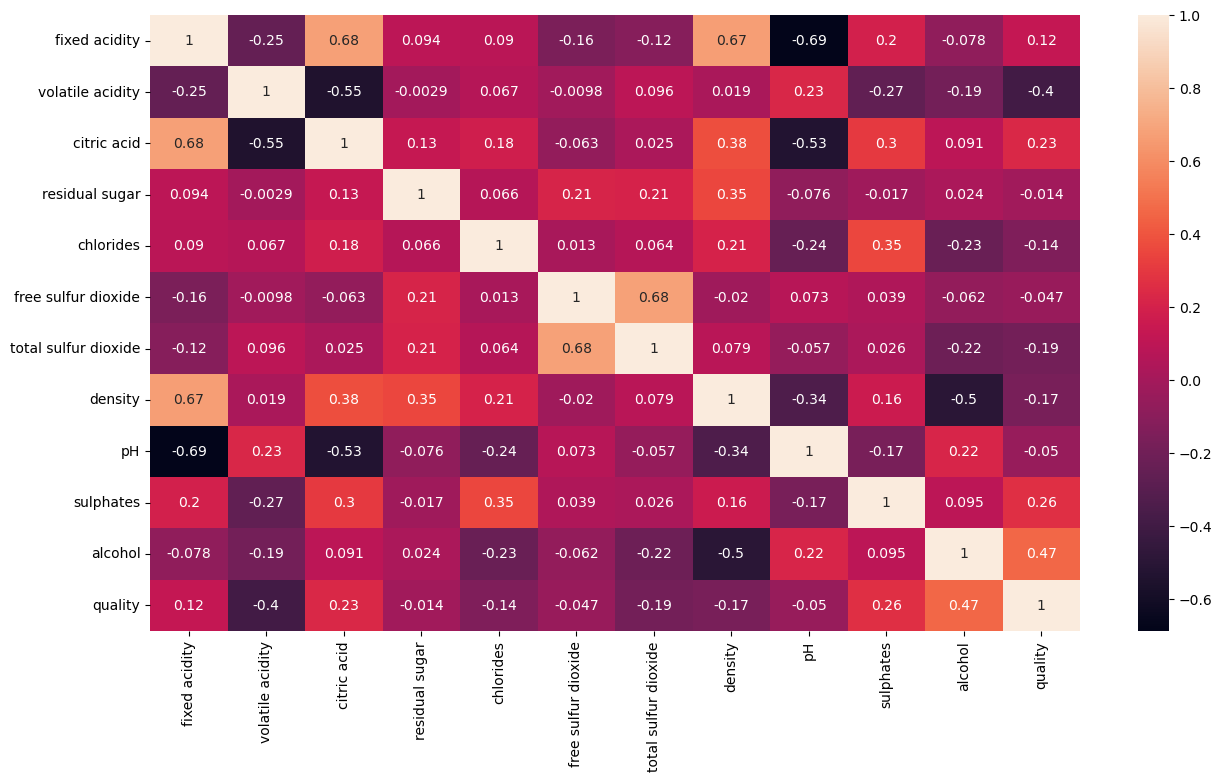

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train =  train_data.drop(['quality'], axis=1), train_data['quality']

x_train_s = scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [19]:
test_data = x_test.join(y_test)
x_test, y_test =  test_data.drop(['quality'], axis=1), test_data['quality']


In [20]:
test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1549,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8
1372,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,5
1248,6.9,0.410,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,6
141,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,5
724,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1061,9.1,0.400,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1539,7.2,0.390,0.32,1.8,0.065,34.0,60.0,0.99714,3.46,0.78,9.9,5
496,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,6
723,7.1,0.310,0.30,2.2,0.053,36.0,127.0,0.99650,2.94,1.62,9.5,5


In [21]:
x_test_s = scaler.transform(x_test)

In [22]:
reg.score(x_test_s, y_test)

0.3479954014376274

In [23]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [24]:
forest.score(x_test_s, y_test)

0.5278806469783536